In [11]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.decomposition import PCA
data_loc = '/project/wyin/jlee/ml-project/inverse-problem/data'
print(os.getcwd())

/project/wyin/jlee/ml-project/inverse-problem/nearest-neighbors


In [12]:
train_set = np.load(os.path.join(data_loc, 'train-set.npz'))
train_params = train_set['params']
train_dos = train_set['dos']

val_set = np.load(os.path.join(data_loc, 'val-set.npz'))
val_params = val_set['params']
val_dos = val_set['dos']

test_set = np.load(os.path.join(data_loc, 'test-set.npz'))
test_params = test_set['params']
test_dos = test_set['dos']

In [13]:
#With standard scaling
scaler = StandardScaler()
train_dos_scaled = scaler.fit_transform(train_dos)
val_dos_scaled = scaler.transform(val_dos)

In [48]:
#Use pca for dim reduction
pca = PCA(n_components=3)
train_reduced = pca.fit_transform(train_dos_scaled)
val_reduced = pca.transform(val_dos_scaled)
print(train_reduced.shape)
print(np.sum(pca.explained_variance_ratio_))

(106120, 3)
0.5397576926450335


trying n neights = 1
trying n neights = 2
trying n neights = 3
trying n neights = 4
trying n neights = 5
trying n neights = 6
trying n neights = 7
trying n neights = 8
trying n neights = 9
trying n neights = 10
trying n neights = 11
trying n neights = 12
trying n neights = 13
trying n neights = 14
trying n neights = 15
trying n neights = 16
trying n neights = 17
trying n neights = 18
trying n neights = 19
trying n neights = 20
trying n neights = 21
trying n neights = 22
trying n neights = 23
trying n neights = 24
trying n neights = 25
trying n neights = 26
trying n neights = 27
trying n neights = 28
trying n neights = 29
trying n neights = 30
trying n neights = 31
trying n neights = 32
trying n neights = 33
trying n neights = 34
trying n neights = 35
trying n neights = 36
trying n neights = 37
trying n neights = 38
trying n neights = 39
trying n neights = 40
trying n neights = 41
trying n neights = 42
trying n neights = 43
trying n neights = 44
trying n neights = 45
trying n neights = 

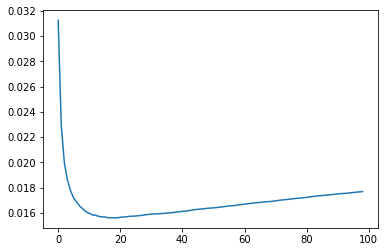

In [50]:
knn_mse_uniform = []
for i in range(1, 100):
    print(f"trying n neights = {i}")
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(train_reduced, train_params)
    predicted = neigh.predict(val_reduced)
    
    mse = np.mean((val_params - predicted)**2)
    knn_mse_uniform.append(mse)

knn_mse_uniform = np.array(knn_mse_uniform)
plt.plot(knn_mse_uniform)
print(np.min(knn_mse_uniform))
print(np.argmin(knn_mse_uniform) + 1)

In [52]:
#Results visualization on validation set
best_model = KNeighborsRegressor(n_neighbors = 18)
best_model.fit(train_reduced, train_params)
predicted = best_model.predict(val_reduced)

mse_mat = (val_params - predicted)**2
mse_list = np.mean(mse_mat, axis = 1)

mse_params = zip(mse_list, predicted, val_params)
mse_params = sorted(mse_params, key = lambda x: x[0], reverse = True)
num_points = len(mse_params)
print(num_points)

13265


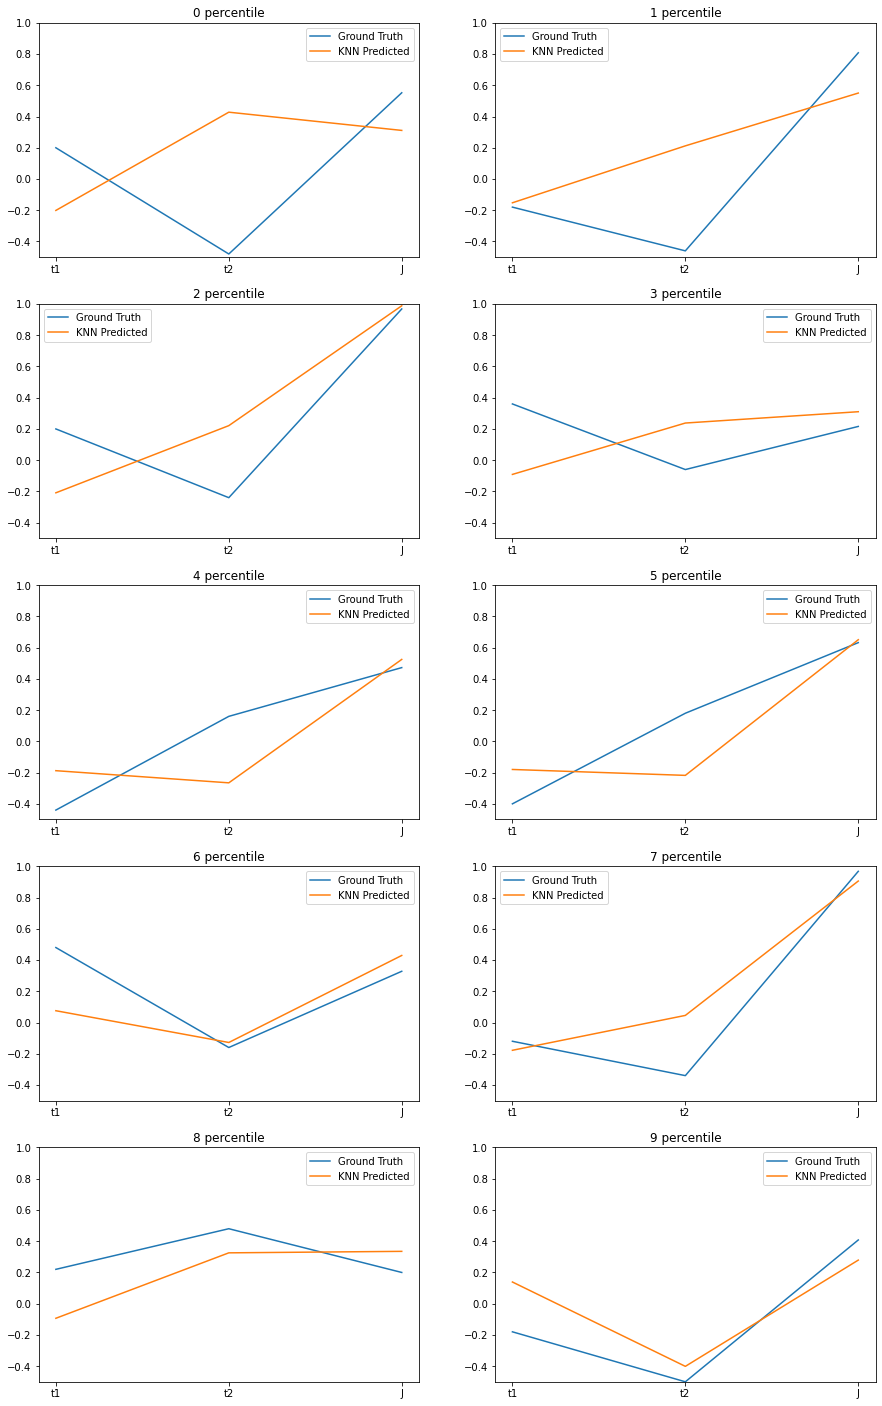

In [53]:
def plot_one(ax, percentile):
    ax.set_ylim([-0.5, 1.0])
    index = percentile * (num_points // 100)
    tick_pos = np.arange(0, 3)
    ax.plot(tick_pos, mse_params[index][2], label = "Ground Truth")
    ax.plot(tick_pos, mse_params[index][1], label = "KNN Predicted")
    #ax.plot(tick_pos, [0, 0, 0.6], label = "baseline")
    
    ax.set_xticks(tick_pos, ('t1', 't2', 'J'))
    ax.set_title(f"{percentile} percentile")
    ax.legend()

fig, ax = plt.subplots(5, 2, figsize = (15, 25))
for i in range(5):
    for j in range(2):
        percentile = 2 * i + j
        plot_one(ax[i][j], percentile)

trying n neights = 1
trying n neights = 2
trying n neights = 3
trying n neights = 4
trying n neights = 5
trying n neights = 6
trying n neights = 7
trying n neights = 8
trying n neights = 9
0.00110534673200197
3


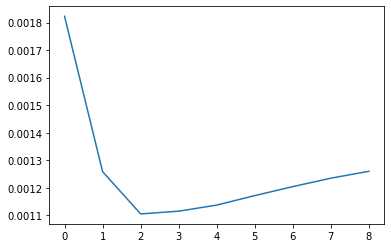

In [10]:
def weight_func(distances):
    return np.exp(-(distances ** 2))

knn_mse_weighted = []
for i in range(1, 10):
    print(f"trying n neights = {i}")
    neigh = KNeighborsRegressor(n_neighbors = i, weights = weight_func)
    neigh.fit(train_reduced, train_params)
    predicted = neigh.predict(val_reduced)
    
    mse = np.mean((val_params - predicted)**2)
    knn_mse_weighted.append(mse)

knn_mse_weighted = np.array(knn_mse_weighted)

plt.plot(knn_mse_weighted)
print(np.min(knn_mse_weighted))
print(np.argmin(knn_mse_weighted) + 1)